# 載入資料

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
chd=pd.read_csv("heart disease.csv")
chd

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [2]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# 處理缺失值

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer_bayes = IterativeImputer(
    estimator = BayesianRidge(),
    max_iter = 50,
    random_state = 0
)

imputer_bayes.fit(chd)
impute_chd = pd.DataFrame(
    data = imputer_bayes.transform(chd),
    columns = chd.columns
)
impute_chd

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.000000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.013617,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.528958,0.0


In [4]:
impute_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   float64
dtypes: float64(16)
memory usage: 529.9 KB


In [5]:
impute_chd['glucose'][0:20]

0      77.000000
1      76.000000
2      70.000000
3     103.000000
4      85.000000
5      99.000000
6      85.000000
7      78.000000
8      79.000000
9      88.000000
10     76.000000
11     61.000000
12     64.000000
13     84.000000
14     79.991658
15     70.000000
16     72.000000
17     89.000000
18     78.000000
19     65.000000
Name: glucose, dtype: float64

# 使用Sequential API來建立模型

In [6]:
from keras.models import Sequential  #匯入Sequential模型和Dense層
from keras.layers import Dense

In [14]:
model = Sequential()   #建立Sequential物件
model.add(Dense(8, input_shape=(15,), activation="relu"))   #unit,input_shape,activation分別代表10個神經元、輸入資料維度15、激活函數用relu
model.add(Dense(4, activation="relu"))   #新增第2層隱藏層，15個神經元
model.add(Dense(1, activation="sigmoid")) #輸出層，Sigmoid

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [17]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(impute_chd.loc[:4237, 'male':'glucose'], impute_chd.TenYearCHD, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, random_state=42)

In [18]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_valid, Y_valid))

Epoch 1/30
75/75 [==============================] - 1s 3ms/step - loss: 2.8333 - accuracy: 0.7825 - val_loss: 0.6190 - val_accuracy: 0.8289
Epoch 2/30
75/75 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.8536 - val_loss: 0.5710 - val_accuracy: 0.8289
Epoch 3/30
75/75 [==============================] - 0s 957us/step - loss: 0.5493 - accuracy: 0.8549 - val_loss: 0.5380 - val_accuracy: 0.8289
Epoch 4/30
75/75 [==============================] - 0s 970us/step - loss: 0.5183 - accuracy: 0.8496 - val_loss: 0.5148 - val_accuracy: 0.8289
Epoch 5/30
75/75 [==============================] - 0s 943us/step - loss: 0.4842 - accuracy: 0.8624 - val_loss: 0.4986 - val_accuracy: 0.8289
Epoch 6/30
75/75 [==============================] - 0s 957us/step - loss: 0.4698 - accuracy: 0.8577 - val_loss: 0.4871 - val_accuracy: 0.8289
Epoch 7/30
75/75 [==============================] - 0s 938us/step - loss: 0.4663 - accuracy: 0.8474 - val_loss: 0.4789 - val_accuracy: 0.8289
Epoch 8/30

In [19]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_valid, Y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

75/75 [==============================] - 0s 458us/step - loss: 0.4219 - accuracy: 0.8506
訓練資料集資訊：
loss = 0.42
準確度 = 0.85
-------------------------------------------
25/25 [==============================] - 0s 499us/step - loss: 0.4583 - accuracy: 0.8289
驗證資料集資訊：
loss = 0.46
準確度 = 0.83


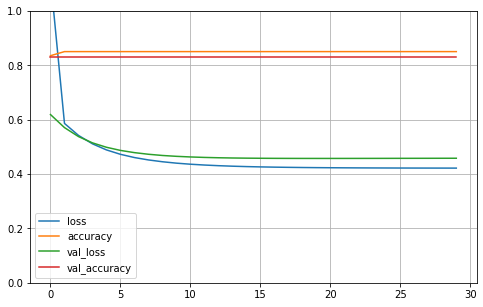

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

# 使用Sequential API來建立回歸MLP

In [14]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(impute_chd.loc[:4237, 'male':'glucose'], impute_chd.TenYearCHD, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
X_new = X_test[:3]    #假裝這些是新樣本
Y_pred = model.predict(X_new)

Epoch 1/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6222 - val_loss: 0.3960
Epoch 2/20
75/75 [==============================] - 0s 970us/step - loss: 0.3442 - val_loss: 0.2985
Epoch 3/20
75/75 [==============================] - 0s 916us/step - loss: 0.2567 - val_loss: 0.2634
Epoch 4/20
75/75 [==============================] - 0s 930us/step - loss: 0.2331 - val_loss: 0.2449
Epoch 5/20
75/75 [==============================] - 0s 916us/step - loss: 0.2173 - val_loss: 0.2324
Epoch 6/20
75/75 [==============================] - 0s 916us/step - loss: 0.2151 - val_loss: 0.2227
Epoch 7/20
75/75 [==============================] - 0s 917us/step - loss: 0.1787 - val_loss: 0.2150
Epoch 8/20
75/75 [==============================] - 0s 930us/step - loss: 0.1917 - val_loss: 0.2087
Epoch 9/20
75/75 [==============================] - 0s 1ms/step - loss: 0.1792 - val_loss: 0.2034
Epoch 10/20
75/75 [==============================] - 0s 930us/step - loss: 0.1770 - val_loss: 0.1990
Epo

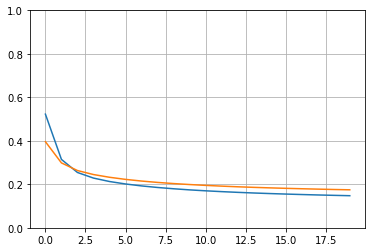

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
Y_pred

array([[ 0.43411988],
       [-0.1843536 ],
       [-0.00421464]], dtype=float32)